In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from src import utils, plotting


pd.set_option('display.float_format', '{:,.0f}'.format)

ticker = "AAPL".upper()
period = "10y"
stock = yf.Ticker(ticker)
history = stock.history(period=period)

/Users/ivankyulev/Projects/Notebooks/.venv/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [2]:
history.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,"2,516","2,516","2,516","2,516","2,516","2,516","2,516"
mean,78,79,78,78,"131,950,826",0,0
std,58,58,57,58,"77,514,861",0,0
min,16,16,16,16,"24,048,300",0,0
25%,28,28,28,28,"79,645,625",0,0
50%,48,49,48,48,"109,934,600",0,0
75%,137,139,135,137,"163,107,400",0,0
max,198,199,197,198,"759,911,600",0,7


In [3]:
stock.cash_flow

,2023-09-30,2022-09-30,2021-09-30,2020-09-30
Free Cash Flow,"99,584,000,000","111,443,000,000","92,953,000,000","73,365,000,000"
Repurchase Of Capital Stock,"-77,550,000,000","-89,402,000,000","-85,971,000,000","-72,358,000,000"
Repayment Of Debt,"-11,151,000,000","-9,543,000,000","-8,750,000,000","-12,629,000,000"
Issuance Of Debt,"5,228,000,000","5,465,000,000","20,393,000,000","16,091,000,000"
Issuance Of Capital Stock,NaN,NaN,"1,105,000,000","880,000,000"
Capital Expenditure,"-10,959,000,000","-10,708,000,000","-11,085,000,000","-7,309,000,000"
Interest Paid Supplemental Data,"3,803,000,000","2,865,000,000","2,687,000,000","3,002,000,000"
Income Tax Paid Supplemental Data,"18,679,000,000","19,573,000,000","25,385,000,000","9,501,000,000"
End Cash Position,"30,737,000,000","24,977,000,000","35,929,000,000","39,789,000,000"
Beginning Cash Position,"24,977,000,000","35,929,000,000","39,789,000,000","50,224,000,000"


In [4]:
stock.financials

,2023-09-30,2022-09-30,2021-09-30,2020-09-30
Tax Effect Of Unusual Items,0,0,0,0
Tax Rate For Calcs,0,0,0,0
Normalized EBITDA,"129,188,000,000","133,138,000,000","123,136,000,000","81,020,000,000"
Net Income From Continuing Operation Net Minority Interest,"96,995,000,000","99,803,000,000","94,680,000,000","57,411,000,000"
Reconciled Depreciation,"11,519,000,000","11,104,000,000","11,284,000,000","11,056,000,000"
Reconciled Cost Of Revenue,"214,137,000,000","223,546,000,000","212,981,000,000","169,559,000,000"
EBITDA,"129,188,000,000","133,138,000,000","123,136,000,000","81,020,000,000"
EBIT,"117,669,000,000","122,034,000,000","111,852,000,000","69,964,000,000"
Net Interest Income,"-183,000,000","-106,000,000","198,000,000","890,000,000"
Interest Expense,"3,933,000,000","2,931,000,000","2,645,000,000","2,873,000,000"


In [5]:
history

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-02-27 00:00:00-05:00,16,17,16,17,301882000,0,0
2014-02-28 00:00:00-05:00,17,17,16,17,371968800,0,0
2014-03-03 00:00:00-05:00,16,17,16,17,238781200,0,0
2014-03-04 00:00:00-05:00,17,17,17,17,259140000,0,0
2014-03-05 00:00:00-05:00,17,17,17,17,200062800,0,0
...,...,...,...,...,...,...,...
2024-02-20 00:00:00-05:00,182,182,180,182,53665600,0,0
2024-02-21 00:00:00-05:00,182,183,181,182,41529700,0,0
2024-02-22 00:00:00-05:00,183,185,182,184,52292200,0,0


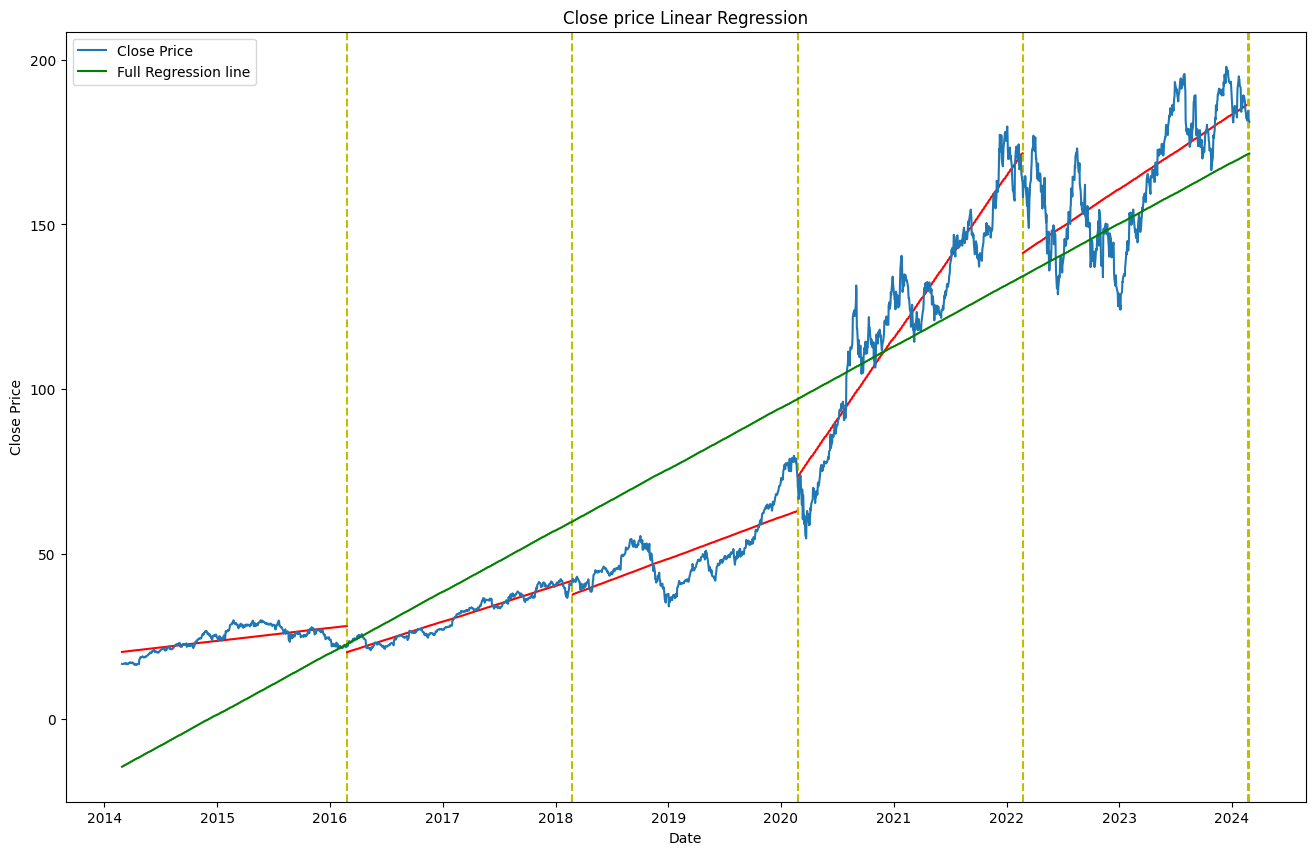

In [6]:
plotting.plot_regression_line(history, reg_line_count=5)

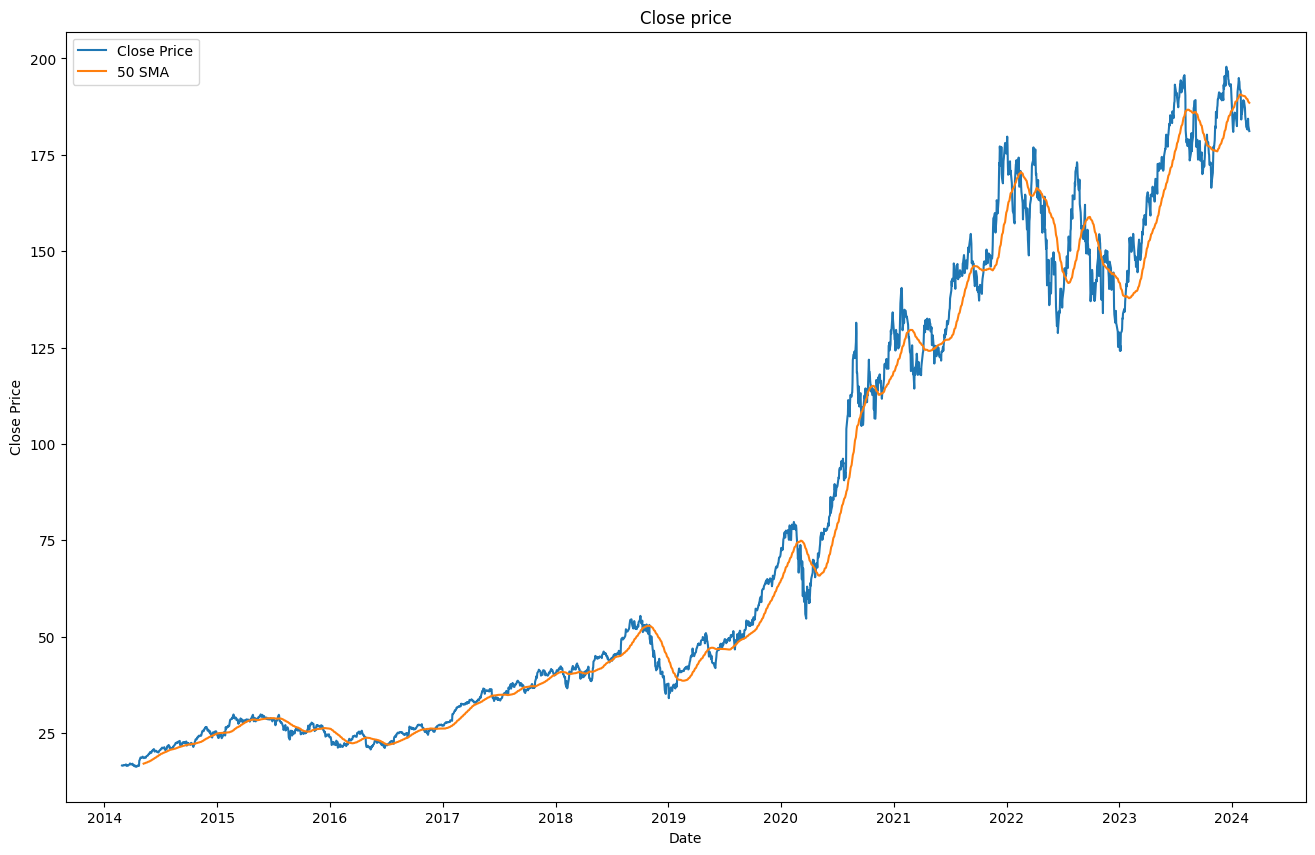

In [7]:
plotting.plot_sma(history, [50])

In [10]:
a = history['Close'] / history['Close'].shift(1)
a

Date
2020-12-16 00:00:00-05:00   NaN
2020-12-17 00:00:00-05:00     1
2020-12-18 00:00:00-05:00     1
2020-12-21 00:00:00-05:00     1
2020-12-22 00:00:00-05:00     1
                             ..
2024-02-15 00:00:00-05:00     1
2024-02-16 00:00:00-05:00     1
2024-02-20 00:00:00-05:00     1
2024-02-21 00:00:00-05:00     1
2024-02-22 00:00:00-05:00     1
Name: Close, Length: 800, dtype: float64